## Problem Statment



With the ongoing global health challenges, particularly the COVID-19 pandemic, ensuring the proper use of face masks in public places has become crucial. Automating the detection of face masks can aid in monitoring and enforcing safety measures, thereby helping to curb the spread of the virus.Develop a machine learning model capable of accurately predicting whether individuals in images are wearing face masks. The model should classify images into one of two categories: 'mask', 'no mask'

In [10]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
import cv2
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Data Prepration

In [2]:
categories =['with_mask',"without_mask"]

In [3]:
## Create a path  and read the image in the folder 
for categeory in categories:
    path = os.path.join('train',categeory)
    
    for file in os.listdir(path):
        img_path =os.path.join(path,file)
        img =cv2.imread(img_path)
        img =cv2.resize(img,(224,224))
       # print(img.shape)
        ##print(img_path)
       ## break #(we comment the break so w getting all image sizes)
    
        
    print(path)

train\with_mask
train\without_mask


In [4]:
## Now we create dataset in that one column is for image numpy array and other lables  and display first image
data=[]
for categeory in categories:
    path = os.path.join('train',categeory)
    
    label = categories.index(categeory)## means categories index 0 for with mask and 1 for without_mask
    
    for file in os.listdir(path):
        #img_path =cv2.imread(os.path.join(path,file))
        img_path =os.path.join(path,file)
        img =cv2.imread(img_path)
        img =cv2.resize(img,(224,224))
        #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        #plt.show()
        #break
    #break
        
        data.append([img,label])

In [5]:
len(data) 

1279

* We have total 1279 images in the folder both with and without mask

In [6]:
##Suffel the data
random.shuffle(data)

In [7]:
## Seperate both x and y
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)



In [8]:
len(x)

1279

In [9]:
len(y)

1279

In [10]:
## Covert into numapy array
X = np.array(x)##Data
y = np.array(y)##Label

X =np.array(X).reshape(-1,224,224,3)

In [11]:
## we have features in X
X.shape

(1279, 224, 224, 3)

In [12]:
##we have labels in y
y.shape

(1279,)

In [13]:
y[25]##Without_mask

0

In [14]:
y[1000]##With_mask

0

In [15]:
## Scaling the X
X = X/255

In [16]:
X[0]

array([[[0.76470588, 0.82352941, 0.85098039],
        [0.85098039, 0.91764706, 0.94117647],
        [0.85882353, 0.85490196, 0.91764706],
        ...,
        [0.76862745, 0.80784314, 0.80784314],
        [0.8745098 , 0.89411765, 0.89803922],
        [0.84705882, 0.85490196, 0.8627451 ]],

       [[0.78039216, 0.78431373, 0.80392157],
        [0.77254902, 0.81568627, 0.83921569],
        [0.81960784, 0.82745098, 0.8627451 ],
        ...,
        [0.81960784, 0.84313725, 0.84313725],
        [0.77647059, 0.78823529, 0.79215686],
        [0.77647059, 0.76470588, 0.77254902]],

       [[0.89019608, 0.85490196, 0.86666667],
        [0.8       , 0.82352941, 0.83137255],
        [0.85098039, 0.86666667, 0.8745098 ],
        ...,
        [0.84705882, 0.8627451 , 0.87843137],
        [0.85098039, 0.85098039, 0.87058824],
        [0.79607843, 0.77647059, 0.8       ]],

       ...,

       [[0.78823529, 0.81960784, 0.80392157],
        [0.80392157, 0.82352941, 0.82745098],
        [0.79607843, 0

In [17]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y=pickle.load(pickle_in)

# Model Training


In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [20]:
print("Shape of X_train ", X_train.shape)
print("Shape of y_train ", y_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of y_test ", y_test.shape)

Shape of X_train  (1023, 224, 224, 3)
Shape of y_train  (1023,)
Shape of X_test  (256, 224, 224, 3)
Shape of y_test  (256,)


## Transfer learning

In [21]:
from keras.applications.vgg16 import VGG16
from keras.applications.mobilenet import MobileNet
from keras import layers


##vgg=VGG16()## Pretrained maodel
model = VGG16()
#model =MobileNet()

In [22]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
## deactive the trainable layers 
for layer in model.layers:
    layer.trainable=False

In [24]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 138,357,544 (527.79 MB)

In [29]:
base_input = model

In [30]:
base_output = model.layers[-4].output

In [31]:
flat_layer =layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)## 0 1
final_output = layers.Activation('sigmoid')(final_output)

In [32]:
new_model = keras.Model(inputs= base_input.input, outputs = final_output)

In [33]:
new_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [34]:
new_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
new_model.fit(X,y,epochs=5,validation_split=0.1)

Epoch 1/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.7477 - loss: 0.4539 - val_accuracy: 0.9688 - val_loss: 0.0661
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 243s 7s/step - accuracy: 0.9830 - loss: 0.0466 - val_accuracy: 0.9922 - val_loss: 0.0531
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 216s 6s/step - accuracy: 0.9973 - loss: 0.0206 - val_accuracy: 0.9922 - val_loss: 0.0362
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 223s 6s/step - accuracy: 0.9994 - loss: 0.0140 - val_accuracy: 0.9922 - val_loss: 0.0329
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 209s 6s/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.9922 - val_loss: 0.0280


In [1]:
new_model.save('my_model.h5')

NameError: name 'new_model' is not defined

In [7]:
new_model=tf.keras.models.load_model("my_model.h5")

## Check the prediction with sample images

### Check  With mask Image

In [5]:
img= cv2.imread('samples\yy.jpg')

In [6]:
img.shape

(270, 376, 3)

In [7]:
print(type(img))

<class 'numpy.ndarray'>


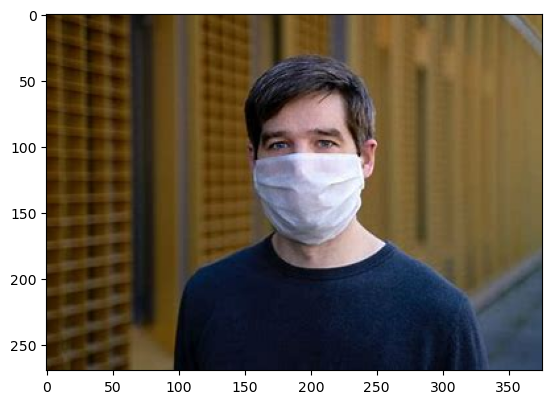

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
final_image = cv2.resize(img,(224,224))
final_image=np.expand_dims(final_image,axis= 0)
final_image=final_image/255.0

In [10]:
predict =new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step


In [11]:
predict

array([[0.08930714]], dtype=float32)

In [4]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [13]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [14]:
gray.shape

(270, 376)

In [15]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print('Face Not Detected')
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi =roi_color[ey: ey+eh,ex:ex + ew]
            

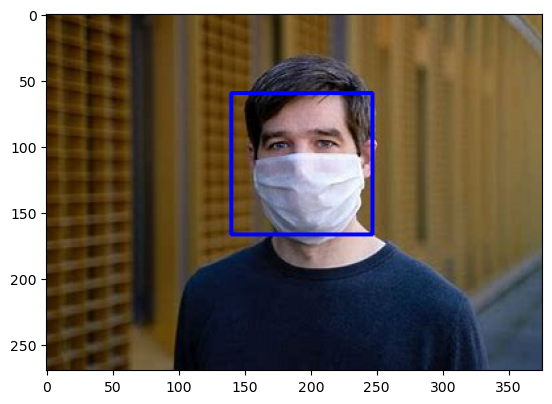

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


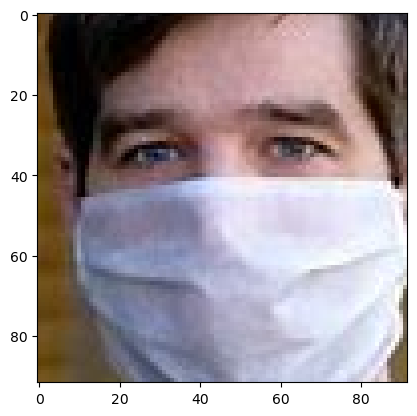

In [17]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [18]:
final_image = cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis= 0)
final_image=final_image/255.0

In [19]:
predict =new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


In [20]:
predict

array([[0.44833085]], dtype=float32)

* It predict the as 0.4 because we use activation as sgimoid lessthan 0.5 means anything less than 0.5 consider 0 which is with_mask

## Check without mask image

In [137]:
img= cv2.imread('samples\mmm.jpg')
print(img.shape)
print(type(img))

(330, 231, 3)
<class 'numpy.ndarray'>


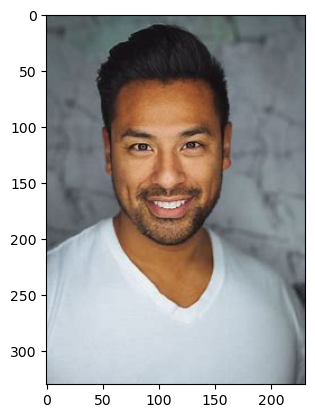

In [138]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [1]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

NameError: name 'cv2' is not defined

In [140]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [141]:
gray.shape

(330, 231)

In [143]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print('Face Not Detected')
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi =roi_color[ey: ey+eh,ex:ex + ew]
            

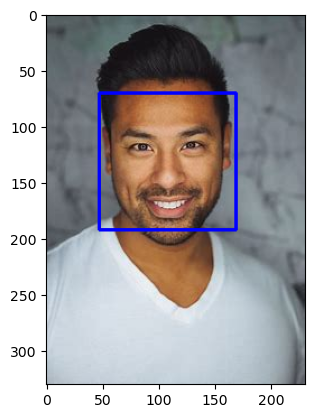

In [144]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


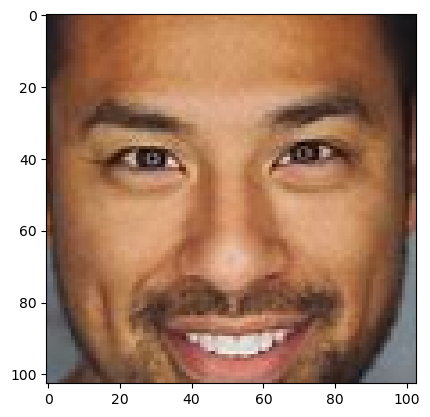

In [145]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [146]:
final_image = cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis= 0)
final_image=final_image/255.0

In [147]:
predict =new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


In [148]:
predict

array([[0.99695545]], dtype=float32)

* It predict the as 0.9 because we use activation as sgimoid  which greaterthan 0.5 means anything greater than 0.5 consider 1 which is without_mask

## Video Demo

In [9]:
## pip install opencv-contrib-python fullpackage
#from deepface import Deepface ## pip install deepface
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros((500, 500))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey, ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face
            
    final_image =cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0) ## need fourth dimension
    final_image=final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (Predictions>0.5):
        status = "No Mask"

        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame,status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
    else:
        status = "Face Mask"

        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        cv2.putText(frame,status,(100, 150),font, 3,(0, 255,0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255,0))
        
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    #faces = faceCascade.detectMultiScale(gray,1.1,4)

    # Draw a rectangle around the faces
    #for(x, y, w, h) in faces:
    # cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Use putText() method for
    # inserting text on video

    cv2.imshow('Face Mask Detection',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


## Result

![With%20mask%20%282%29.png](attachment:With%20mask%20%282%29.png)

In [ ]:
![without_mask.png](attachment:without_mask.png)